## Gradient Descent
Predict => Calculate Error => Learn, adjust the parameters of the initial prediction | REPEAT

### Cost Functions
Loss Functions, Error Functions, Objective Function

In [2]:
# Notebooks import
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Example 1 - A simple cost function

$f(x) = x^2 + x + 1$

In [3]:
def f(x):
    return x**2 + x + 1

In [4]:
# Make Data
x_1 = np.linspace(start = -3, stop = 3, num = 100) # Generate evenly spaced numbers
x_1

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

(-3.0, 3.0)

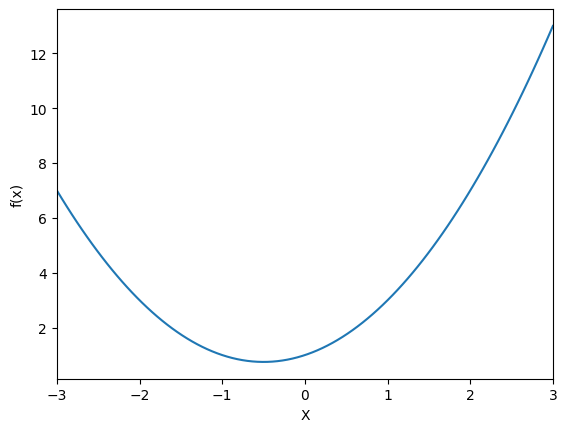

In [5]:
# Plot
plt.xlabel("X")
plt.ylabel("f(x)")
plt.plot(x_1, f(x_1))
plt.xlim([-3,3])

La derivada es Rate of change

In [6]:
def df(x):
    return 2 * x + 1

(-3.0, 3.0)

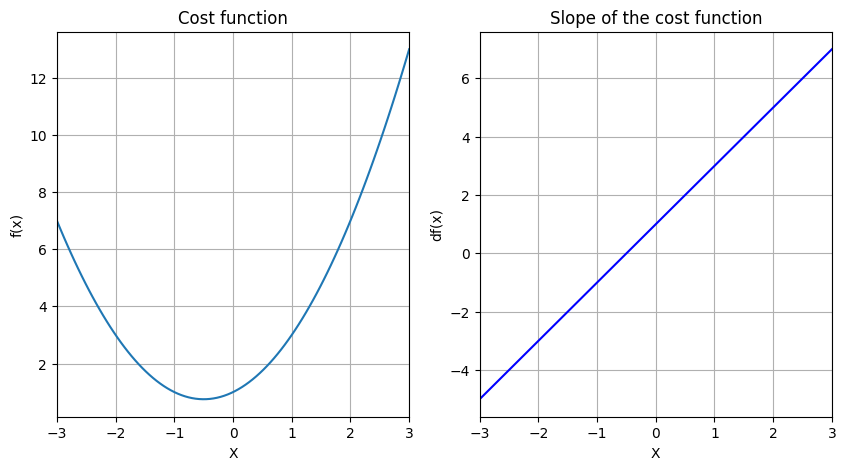

In [7]:
plt.figure(figsize=[10,5])

# Cost Function
plt.subplot(1 ,2, 1) # Rows, columns, position
plt.title("Cost function")
plt.xlabel("X")
plt.ylabel("f(x)")
plt.grid()
plt.plot(x_1, f(x_1))
plt.xlim([-3,3])

# Derivative Function
plt.subplot(1 ,2, 2)
plt.title("Slope of the cost function")
plt.xlabel("X")
plt.ylabel("df(x)")
plt.grid()
plt.plot(x_1, df(x_1), color="blue")
plt.xlim([-3,3])

## Gradient Descent

In [8]:
new_x = 3 # Starting point
previous_x = 0 # Temporal value
step_multiplier = 0.1

for n in range(500):
    # Set initial point
    previous_x = new_x

    # Calculating the error
    gradient = df(previous_x) 

    # Take a step proportional to the slope.
    new_x = previous_x - step_multiplier *  gradient

print("Local minimum at:", new_x)
print("Slope of df(x):", df(new_x))
print("f(x) value or cost at point:", f(new_x))

Local minimum at: -0.4999999999999999
Slope of df(x): 2.220446049250313e-16
f(x) value or cost at point: 0.75


### Evitar recorrer de más estableciendo una precision 

In [9]:
new_x = 3 # Starting point
previous_x = 0 # Temporal value
step_multiplier = 0.1

precision = 0.0001

count = 0
for n in range(500):
    # Set initial point
    previous_x = new_x

    # Calculating the error
    gradient = df(previous_x) 

    # Take a step proportional to the slope.
    new_x = previous_x - step_multiplier *  gradient

    if(abs(new_x - previous_x)) < precision:
        print(count)
        break

    count += 1


print("Local minimum at:", new_x)
print("Slope of df(x):", df(new_x))
print("f(x) value or cost at point:", f(new_x))

40
Local minimum at: -0.49962781616118024
Slope of df(x): 0.0007443676776395236
f(x) value or cost at point: 0.7500001385208099


### Graficar los pasos

In [10]:
new_x = 3 # Starting point
previous_x = 0 # Temporal value
step_multiplier = 0.1
precision = 0.0001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    # Set initial point
    previous_x = new_x

    # Calculating the error
    gradient = df(previous_x) 

    # Take a step proportional to the slope.
    new_x = previous_x - step_multiplier *  gradient

    x_list.append(new_x)
    slope_list.append(df(new_x))

    if(abs(new_x - previous_x)) < precision:
        print(n)
        break

print("Local minimum at:", new_x)
print("Slope of df(x):", df(new_x))
print("f(x) value or cost at point:", f(new_x))

40
Local minimum at: -0.49962781616118024
Slope of df(x): 0.0007443676776395236
f(x) value or cost at point: 0.7500001385208099


(-3.0, 3.0)

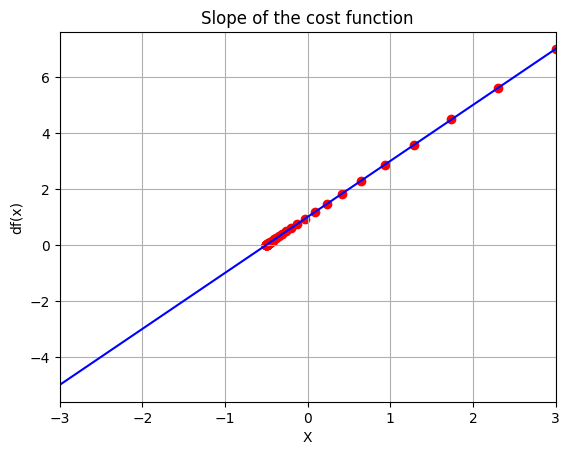

In [11]:
# Plot
plt.scatter(x_list, slope_list, color="red")
# Derivative Function
plt.title("Slope of the cost function")
plt.xlabel("X")
plt.ylabel("df(x)")
plt.grid()
plt.plot(x_1, df(x_1), color="blue")
plt.xlim([-3,3])

### Superimpose steps on Cost function and derivative

(-3.0, 3.0)

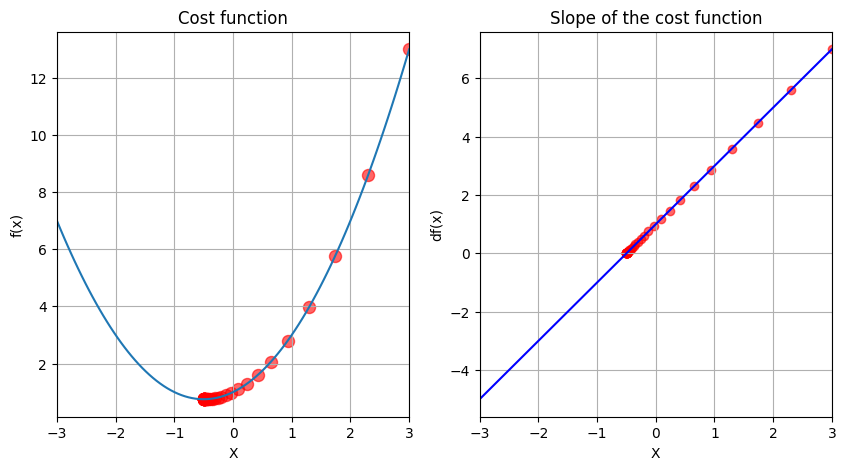

In [12]:
plt.figure(figsize=[10,5])

# Cost Function

plt.subplot(1 ,2, 1) # Rows, columns, position
plt.scatter(x_list, f(np.array(x_list)), color="red", alpha=0.6, s=75)

plt.title("Cost function")
plt.xlabel("X")
plt.ylabel("f(x)")
plt.grid()
plt.plot(x_1, f(x_1))
plt.xlim([-3,3])

# Derivative Function
plt.subplot(1 ,2, 2)
plt.scatter(x_list, slope_list, color="red", alpha=0.6)

plt.title("Slope of the cost function")
plt.xlabel("X")
plt.ylabel("df(x)")
plt.grid()
plt.plot(x_1, df(x_1), color="blue")
plt.xlim([-3,3])

Close Up

(0.0, 3.0)

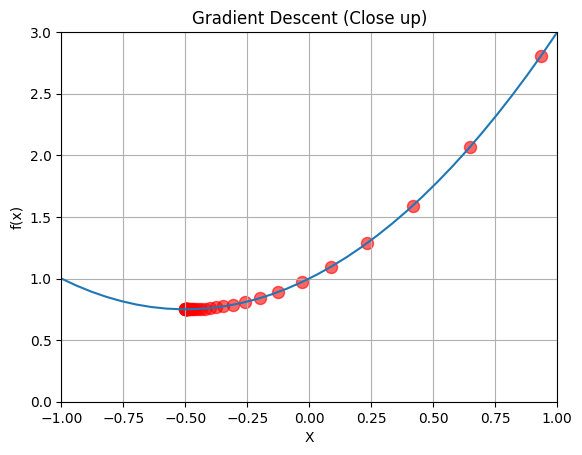

In [13]:
plt.scatter(x_list, f(np.array(x_list)), color="red", alpha=0.6, s=75)

plt.title("Gradient Descent (Close up)")
plt.xlabel("X")
plt.ylabel("f(x)")
plt.grid()
plt.plot(x_1, f(x_1))
plt.xlim(-1,1)
plt.ylim(0,3)

## Example 2 - Multiple Minima vs Initial Guess Advanced Functions
### $g(x) = x^4 - 4x^2 + 5$


In [14]:
x_2 = np.linspace(-2,2, 1000)

# G Function
def g(x):
    return x**4 - 4*x**2 + 5

# Derivative of G func
def dg(x):
    return 4*x**3 - 8*x 

(-6.0, 6.0)

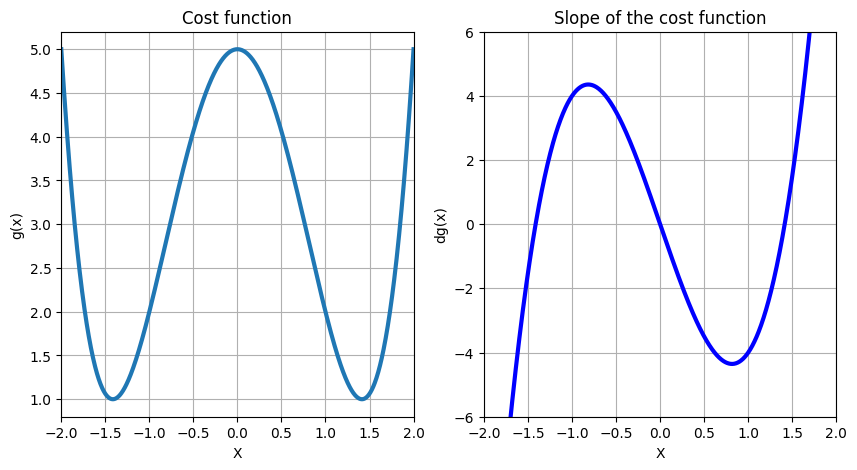

In [15]:
plt.figure(figsize=[10,5])

# Cost Function
plt.subplot(1 ,2, 1) # Rows, columns, position
plt.title("Cost function")
plt.xlabel("X")
plt.ylabel("g(x)")
plt.grid()
plt.plot(x_2, g(x_2), linewidth=3)
plt.xlim([-2,2])

# Derivative Function
plt.subplot(1 ,2, 2)
plt.title("Slope of the cost function")
plt.xlabel("X")
plt.ylabel("dg(x)")
plt.grid()
plt.plot(x_2, dg(x_2), color="blue", linewidth=3)
plt.xlim([-2,2])
plt.ylim([-6,6])

Podemos ver que existen 2 minimos. Y existen 3 puntos la pendiente de la derivada es 0, Estos corresponden a los dos mínimos y al máximo.

## Gradient Descent as Python Function

In [16]:
# Gradient Descent
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iterations = 500):
    new_x = initial_guess # Starting point
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iterations):
        previous_x = new_x
        gradient = derivative_func(previous_x) 
        new_x = previous_x - multiplier *  gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [17]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0.5)

print("Local Min", local_min)
print("number of steps", len(list_x))

Local Min 1.4122375085019094
number of steps 23


In [18]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0.1)

print("Local Min", local_min)
print("number of steps", len(list_x))

Local Min 1.4120887490901561
number of steps 34


Gradient descent derivative and scatterplot

(-6.0, 6.0)

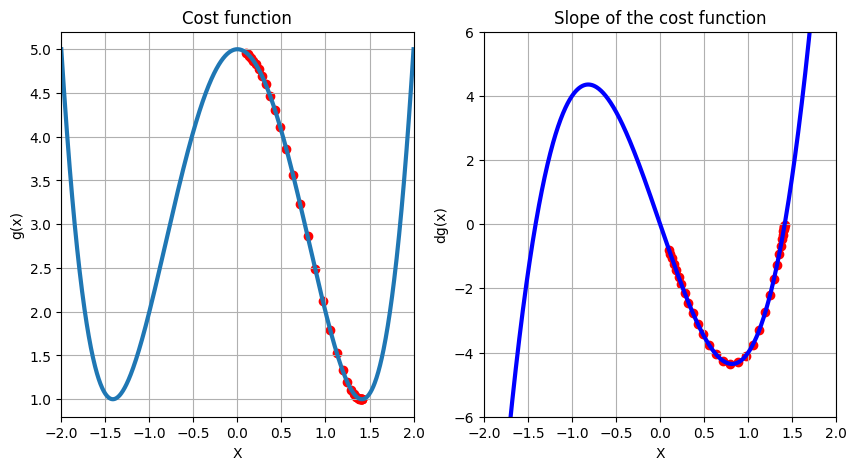

In [19]:

plt.figure(figsize=[10,5])

# Cost Function
plt.subplot(1 ,2, 1) # Rows, columns, position
plt.title("Cost function")
plt.xlabel("X")
plt.ylabel("g(x)")
plt.grid()
plt.plot(x_2, g(x_2), linewidth=3)
plt.scatter(list_x, g(np.array(list_x)), color="red")
plt.xlim([-2,2])

# Derivative Function
plt.subplot(1 ,2, 2)
plt.title("Slope of the cost function")
plt.xlabel("X")
plt.ylabel("dg(x)")
plt.grid()
plt.plot(x_2, dg(x_2), color="blue", linewidth=3)
plt.scatter(list_x, deriv_list, color="red")

plt.xlim([-2,2])
plt.ylim([-6,6])

Stochastic Gradient Descent vs Batch Gradient Descent

# Example 3 - Divergence & Overflow
## $h(x)= x^5 - 2x^4 + 2$

In [20]:
# Make data
x_3 = np.linspace(start = -2.4, stop = 2.5, num = 1000)

def h(x):
    return x ** 5 - 2 * x ** 4 + 2

def dh(x):
    return 5 * x ** 4 - 8*x**3

(-6.0, 6.0)

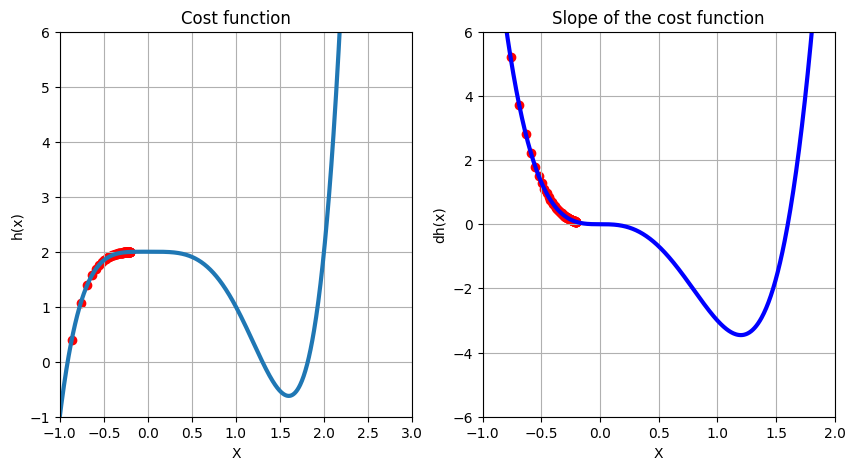

In [21]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess=-0.2, precision=0.0001, max_iterations=65)

plt.figure(figsize=[10,5])

# Cost Function
plt.subplot(1 ,2, 1) # Rows, columns, position
plt.title("Cost function")
plt.xlabel("X")
plt.ylabel("h(x)")
plt.grid()
plt.plot(x_3, h(x_3), linewidth=3)
plt.scatter(list_x, h(np.array(list_x)), color="red")
plt.xlim([-1,3])
plt.ylim([-1,6])

# Derivative Function
plt.subplot(1 ,2, 2)
plt.title("Slope of the cost function")
plt.xlabel("X")
plt.ylabel("dh(x)")
plt.grid()
plt.plot(x_3, dh(x_3), color="blue", linewidth=3)
plt.scatter(list_x, deriv_list, color="red")

plt.xlim([-1,2])
plt.ylim([-6,6])

In [22]:
print("Local min", local_min)
print("Cost", h(local_min))
print("number of steps", len(list_x))

Local min -1.025438654680297
Cost -1.3452385221152747
number of steps 66


In [23]:
import sys

sys.version

'3.13.0 (tags/v3.13.0:60403a5, Oct  7 2024, 09:38:07) [MSC v.1941 64 bit (AMD64)]'

In [24]:
sys.float_info.max

1.7976931348623157e+308

# The Learning Rate

Local Min 1.4129162990363444
number of steps 28


(-6.0, 6.0)

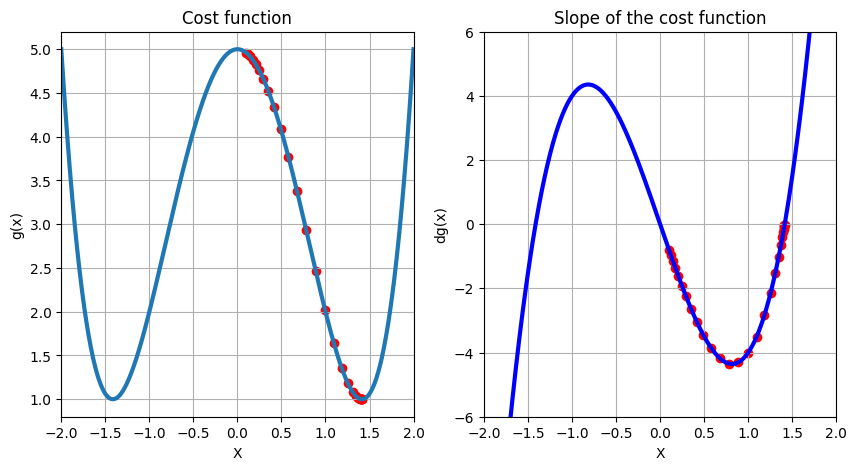

In [25]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0.1, multiplier=0.025, max_iterations=43)

print("Local Min", local_min)
print("number of steps", len(list_x))

plt.figure(figsize=[10,5])

# Cost Function
plt.subplot(1 ,2, 1) # Rows, columns, position
plt.title("Cost function")
plt.xlabel("X")
plt.ylabel("g(x)")
plt.grid()
plt.plot(x_2, g(x_2), linewidth=3)
plt.scatter(list_x, g(np.array(list_x)), color="red")
plt.xlim([-2,2])

# Derivative Function
plt.subplot(1 ,2, 2)
plt.title("Slope of the cost function")
plt.xlabel("X")
plt.ylabel("dg(x)")
plt.grid()
plt.plot(x_2, dg(x_2), color="blue", linewidth=3)
plt.scatter(list_x, deriv_list, color="red")

plt.xlim([-2,2])
plt.ylim([-6,6])

(0.0, 50.0)

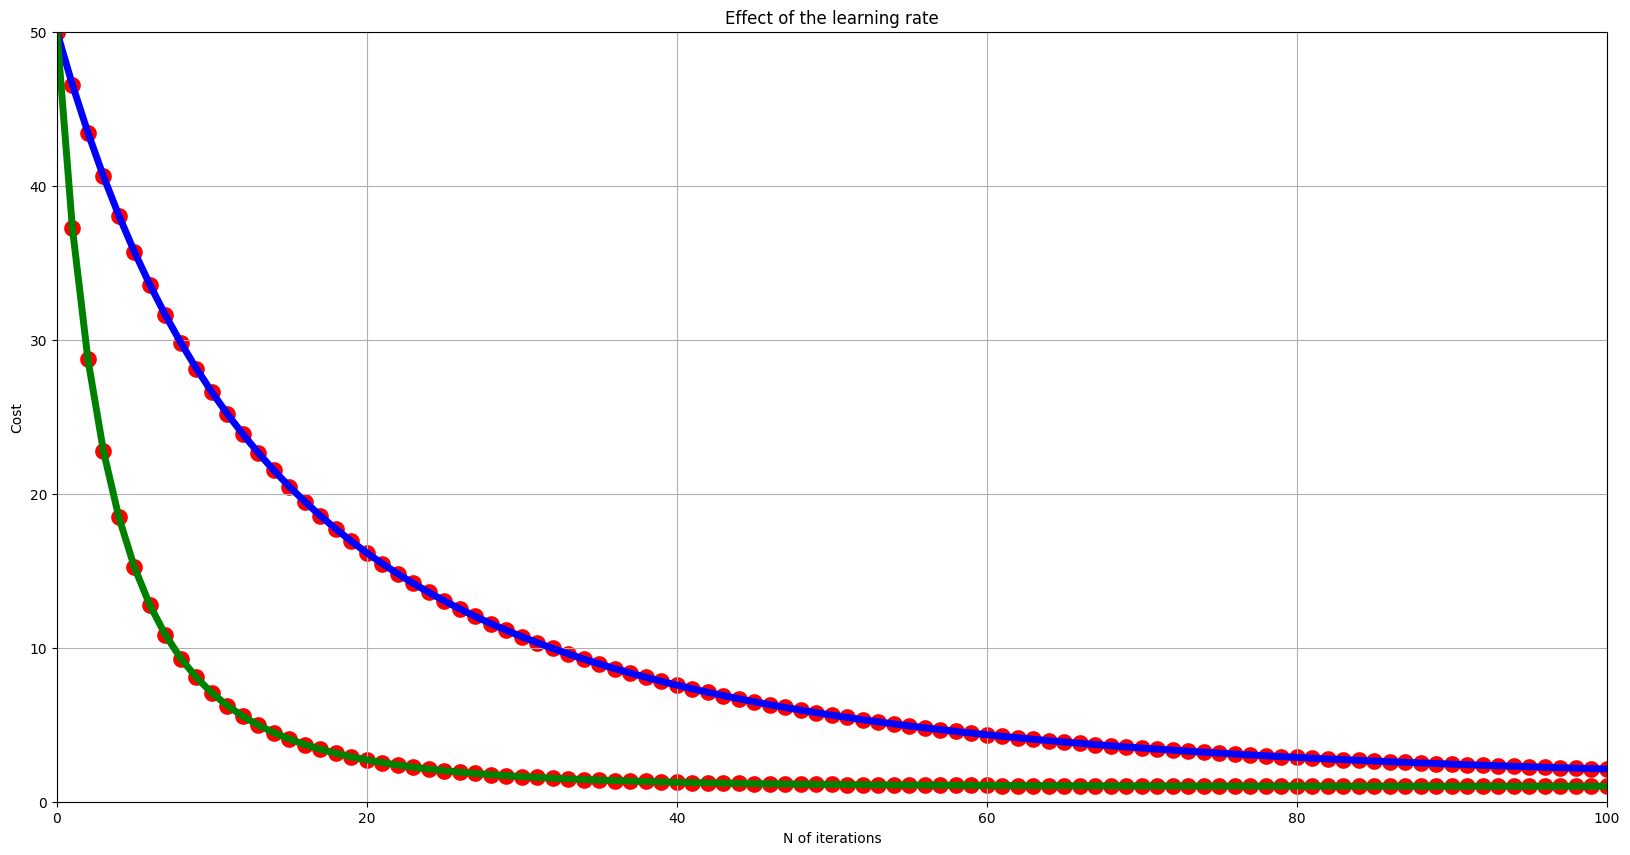

In [47]:
n = 100
low_gamma = gradient_descent(derivative_func=dg,
                              initial_guess=3, multiplier=0.0005
                               ,precision=0.0001, max_iterations=n)


high_gamma = gradient_descent(derivative_func=dg,
                              initial_guess=3, multiplier=0.002
                               ,precision=0.0001, max_iterations=n)

# Plotting reduction in cost for each iteration
plt.figure(figsize=[20,10])

# Cost Function
plt.title("Effect of the learning rate")
plt.xlabel("N of iterations")
plt.ylabel("Cost")
plt.grid()

# Value
# 1) Y axis data: the lists to numpy arrat
low_values = np.array(low_gamma[1])
high_values = np.array(high_gamma[1])

# 2) X axis
x_values = list(range(0, n+1))

# Plotting low learning rate
plt.plot(x_values, g(low_values), color="blue", linewidth=5)
plt.scatter(x_values, g(low_values), color="red", linewidth=6)

plt.plot(x_values, g(high_values), color="green", linewidth=5)
plt.scatter(x_values, g(high_values), color="red", linewidth=6)

plt.xlim([0, n])
plt.ylim([0, 50])